### SVD 奇异值分解

In [19]:
%matplotlib inline

#_*_ coding:utf-8_*_
import numpy as np
import matplotlib.pyplot as plt
import cv2

#### 特征值与特征向量 特征值分解EIG

In [20]:
a = np.mat([[3,1],[1,3]])
print('原始方阵a ',a)

# np.linalg.eig返回两个值，第一个值是矩阵的特征值，第二个返回值是矩阵的特征向量
lam,vet = np.linalg.eig(a)
print('特征值 ',lam)
print('对应的特征向量 ',vet)

原始方阵a  [[3 1]
 [1 3]]
特征值  [4. 2.]
对应的特征向量  [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


#### SVD

Python numpy有一个linalg的线性工具，可以直接来计算SVD的结果

origin image shape is  (326, 438, 3)


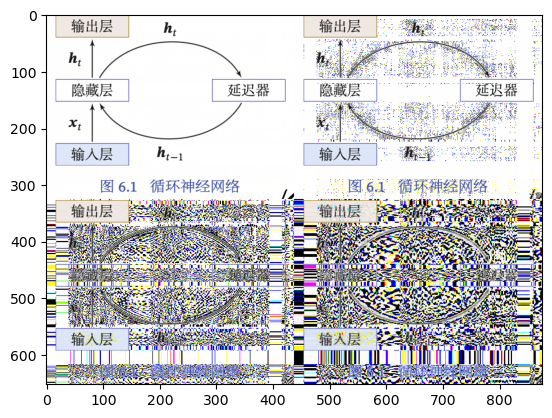

In [21]:
img = cv2.imread('./img/rnn.png')
print('origin image shape is ', img.shape)
# 表示 RGB 中各有一个矩阵，都为300*532

def svd_compression(img, k):
    res_image = np.zeros_like(img)
    for i in range(img.shape[2]):
        # 进行奇异值分解, 从svd函数中得到的奇异值sigma是从大到小排列的
        U, Sigma, VT = np.linalg.svd(img[:,:,i])
        res_image[:, :, i] = U[:,:k].dot(np.diag(Sigma[:k])).dot(VT[:k,:])

    return res_image


# 保留前 k 个奇异值
res1 = svd_compression(img, k=326)
res2 = svd_compression(img, k=200)
res3 = svd_compression(img, k=100)
res4 = svd_compression(img, k=50)

row11 = np.hstack((res1, res2))
row22 = np.hstack((res3, res4))
res = np.vstack((row11, row22))

plt.imshow(res)
plt.show()